# EDA on Employee Attrition Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [4]:
data1= pd.read_csv("C:/Users/JB/Downloads/general_data.csv")
data2= pd.read_csv("C:/Users/JB/Downloads/employee_survey_data.csv")

In [5]:
data= pd.merge(data1, data2, how = 'outer', on= 'EmployeeID')# meger two dataset

# Let's have a quick look at the data we are going to analyze.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Basic Information about Data

1) Dataset contains 4410 rows and 27 columns

2) There are some numerical and some categorical columns

3) Memory usage is 964 KB

### Description of important dataset columns :
1.  Age:                Age of the employee
2.  Attrition :         Whether the employee left in the previous year or not
3.  BusinessTravel :    How frequently the employees travelled for business purposes in the last year
4.  Department:         Department in company
5.  DistanceFromHome:   Distance from home in kms
6.  Education:          Education Level    1)'Below College' 2) College' 3) Bachelor 4) Master 5) Doctor
7.  EducationField:     Field of education
8.  Employeecount:      Employee count
9.  EmployeeID:         Employee number/id
10. Gender:             Gender of employee
11. JobLevel:           Job Involvement Level  1)Low 2) Medium 3) High 4) Very High
12. JobRole:            Name of job role in company
13. MaritalStatus:      Marital status of the employee
14. MonthlyIncome:      Monthly income in rupees per month
15. NumCompaniesWorked: Total number of companies the employee has worked for
16. PercentSalaryHike:  Percent salary hike for last year
17. StockOptionLevel:   Stock option level of the employee
18. YearsAtCompany:     Total number of years spent at the company by the employee
19. LastPromotion:       Number of years since last promotion


In [7]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [8]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,8,0,NaN,6,21,3,9,1.0,3.0,NaN


In [9]:
# shows unique values from the dataset
for el in list(data.columns):
    print(f'================================={el}================================')
    print (data[el].unique())
    print("")

=================================Age================================
[51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

=================================Attrition================================
['No' 'Yes']

=================================BusinessTravel================================
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

=================================Department================================
['Sales' 'Research & Development' 'Human Resources']

=================================DistanceFromHome================================
[ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

=================================Education================================
[2 1 4 5 3]

=================================EducationField================================
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

===================

In [10]:
data['EmployeeCount'].unique()

array([1])

In [11]:
data['EmployeeID'].unique()

array([   1,    2,    3, ..., 4408, 4409, 4410])

In [12]:
data['StandardHours'].unique()

array([8])

In [13]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [14]:
data.drop(['EmployeeCount','Over18', 'StandardHours',  "StockOptionLevel", "TrainingTimesLastYear", "YearsWithCurrManager", "EmployeeID"], axis = 1, inplace = True)

In [15]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,1,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,5,1,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,5.0,5,0,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,13.0,8,7,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,9.0,6,0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,10.0,3,0,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,10.0,3,0,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,5.0,4,1,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,10.0,9,7,4.0,1.0,3.0


## Selecting Categorical columns

In [14]:
# this command is used to select catergorical columns from my data set
cat_col= data.select_dtypes('O').columns
cat_col

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')

## Selecting Numerical columns

In [15]:
# this command is use to select numerical columns from my data set
num_col= data.select_dtypes('int', 'float').columns
num_col

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

## Finding Basic Statistical Infromation about Numerical columns

In [16]:
#this command is use this to find basic statistical info about numerical column .describe() is it used calculate satistical
data[['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'YearsSinceLastPromotion', "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]].describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,65029.312925,15.209524,2.187755,2.723603,2.728246,2.761436
std,9.133301,8.105026,47068.888559,3.659108,3.221699,1.092756,1.101253,0.706245
min,18.000000,1.000000,10090.000000,11.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,29110.000000,12.000000,0.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,49190.000000,14.000000,1.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,83800.000000,18.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,199990.000000,25.000000,15.000000,4.000000,4.000000,4.000000


# Data Cleaning and processing

In [17]:
# this command use for check wheater there is duplicate enteries are there or not
data.duplicated().any()

np.True_

## Checking for null values in a dataset

In [18]:
#to check the null values percent
data.isnull().sum()/len(data)*100

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.430839
PercentSalaryHike          0.000000
TotalWorkingYears          0.204082
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
dtype: float64

In [19]:
data.dropna(subset=['NumCompaniesWorked', "TotalWorkingYears", 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance'], inplace = True)

In [20]:
data.isnull().sum()/len(data)*100

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome           0.0
Education                  0.0
EducationField             0.0
Gender                     0.0
JobLevel                   0.0
JobRole                    0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
PercentSalaryHike          0.0
TotalWorkingYears          0.0
YearsAtCompany             0.0
YearsSinceLastPromotion    0.0
EnvironmentSatisfaction    0.0
JobSatisfaction            0.0
WorkLifeBalance            0.0
dtype: float64

##### Now our dataset is clean. We are ready to use this dataset to conduct our exploratory data analysis

# 1. Find Out the Attrition rate of the company

##### """Attrition rate represents the percentage of employees who leave an organisation over a specific period,
##### either voluntarily or involuntarily. It is a key indicator used by HR departments to monitor and improve 
##### their organisation's workforce planning and overall management."""

In [21]:
#percentage
leave_emp= data[data['Attrition']== 'Yes']['Attrition'].count()
Total_emp= len(data)
Attrition_rate= leave_emp/Total_emp*100
Attrition_rate

np.float64(16.162790697674417)

### Observation:
##### Average attrition rate of the company is 16.16%

# 2. Distribution of Employee Attrition in the company

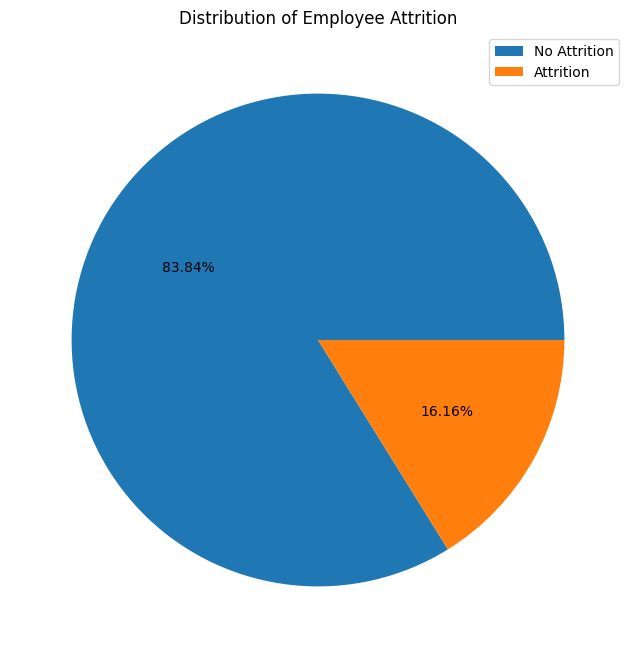

In [22]:
plt.figure(figsize= (8,8)) # this is use for size of plot
plt.title('Distribution of Employee Attrition') #Title
plt.pie(data['Attrition'].value_counts(), autopct= "%.2f%%") #to calculate
plt.legend(labels= ['No Attrition', 'Attrition']) #lable
plt.show() #display

### Observation:

##### From the pie chart we can say that out of 4410 employees, 16.16% of employee left job due to some reasons. whereas 83.84% of employees preferred to continue their job at the company

# 3. Find out Department wise Attrition rate And Visualize it

In [23]:
leave_data= data[data['Attrition']=='Yes']
leave_dept= leave_data.groupby('Department')['Attrition'].count()/len(data)*100
label=leave_dept.index
leave_dept

Department
Human Resources            1.255814
Research & Development    10.302326
Sales                      4.604651
Name: Attrition, dtype: float64

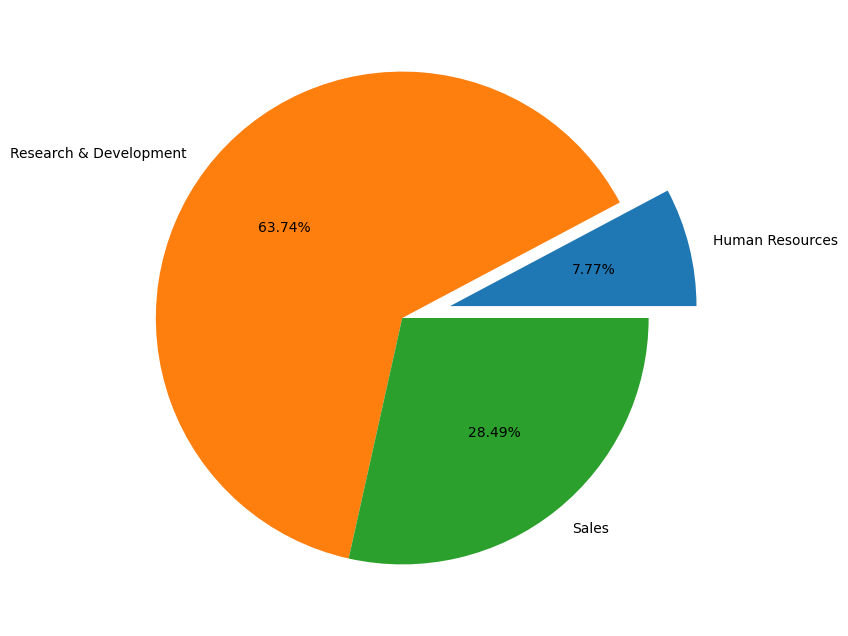

In [24]:
plt.figure(figsize= (8,8))
plt.pie(leave_dept, autopct= "%.2f%%", explode= (0.2,0,0), labels= label)
plt.show()

### Observation:
##### From the above pie chart we can say that, Most of  employees who leaves compnay are from Research and Development Department
#### which is 63.74% of total Attrition.

# 4. Gender vs Attrition #

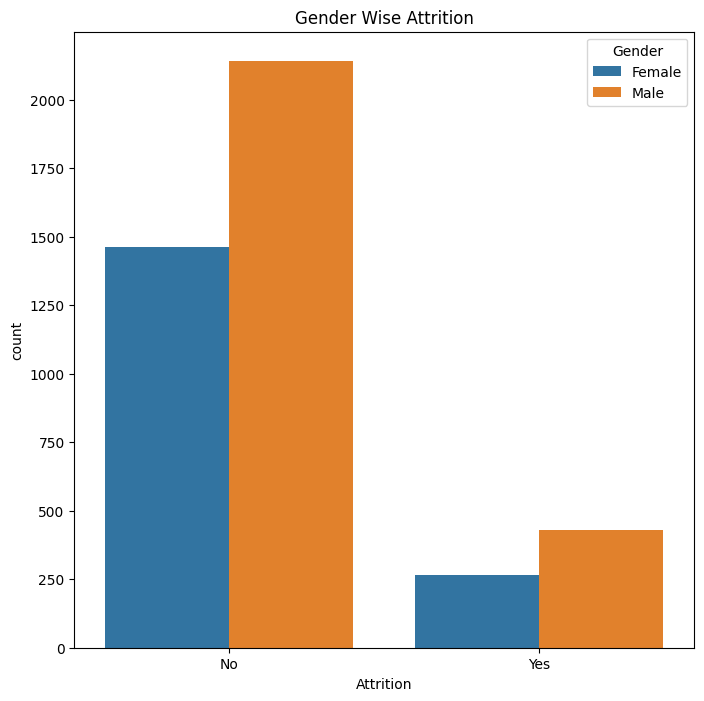

In [25]:
plt.figure(figsize= (8,8))
plt.title("Gender Wise Attrition")
sns.countplot(x= 'Attrition', hue= 'Gender',data= data)
plt.show()

### Observation:
##### Attrition Rate is high among Male employees than Female employees

# 5. Is there any relation between age and number of company changed by employee #

<Axes: xlabel='NumCompaniesWorked', ylabel='Age'>

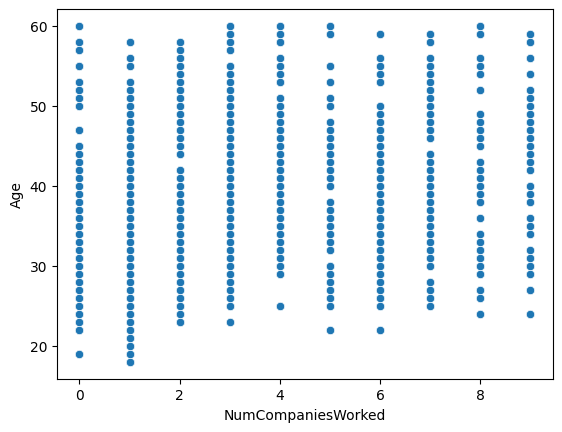

In [26]:
sns.scatterplot(y= 'Age', x='NumCompaniesWorked', data= data)

### Observation:
##### There is no relation between age and number of companies worked

# 6. Find count of employees who have left company and has low job satisfaction(less than and equal to 2)

In [27]:
data[(data['Attrition']=='Yes')&(data['JobSatisfaction']<=2)]['Attrition'].count()

np.int64(329)

# 7. Impact of Bussiness Travel on Attrition

In [28]:
#calculated the value count of column bussness travel which is goup by attrition all that is shown below in chart
p= data.groupby('BusinessTravel')['Attrition'].value_counts(normalize= False).unstack()
p

Attrition,No,Yes
BusinessTravel,,
Non-Travel,404,36
Travel_Frequently,610,199
Travel_Rarely,2591,460


<Figure size 800x500 with 0 Axes>

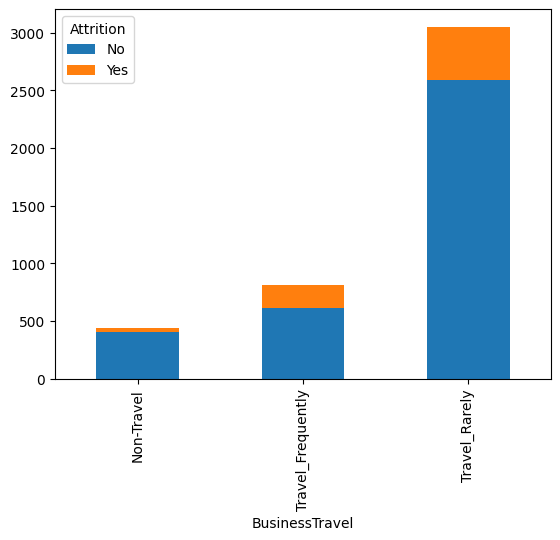

In [29]:
plt.figure(figsize= (8,5))
p.plot(kind= 'bar', stacked = 'False', alpha= 1)
plt.show()

##### Observation
#####  From the above chart we can say that employee who travel rarely have higher attriation, followed by employee who travel frequently

# 8. EducationField Vs Attrition

In [30]:
data["EducationField"].value_counts()

EducationField
Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: count, dtype: int64

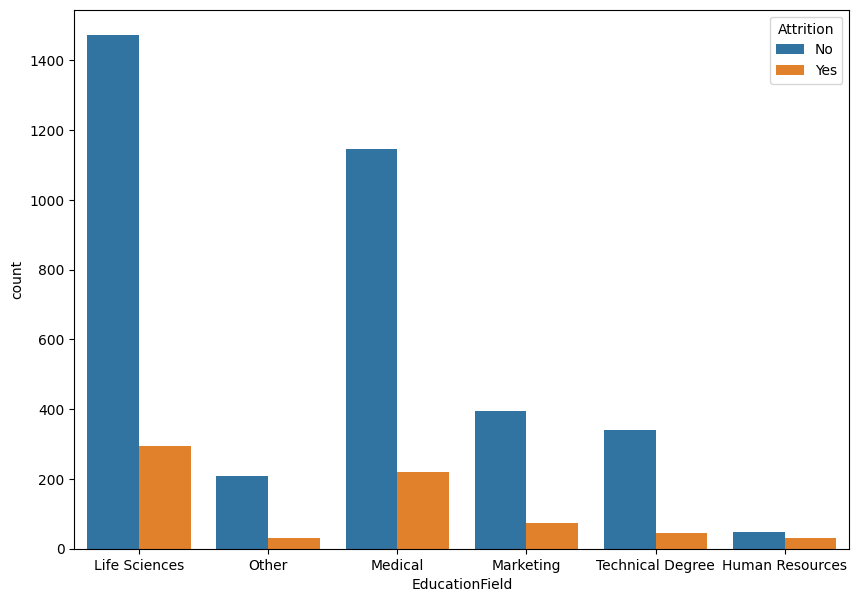

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x="EducationField",hue ="Attrition",data = data )
plt.show()

##### As in above plot we can see that employee who studied Life Science has higher rate of attrition followed by employee who studied medical also left  company

# 9. Marital Status  V/s Attrition

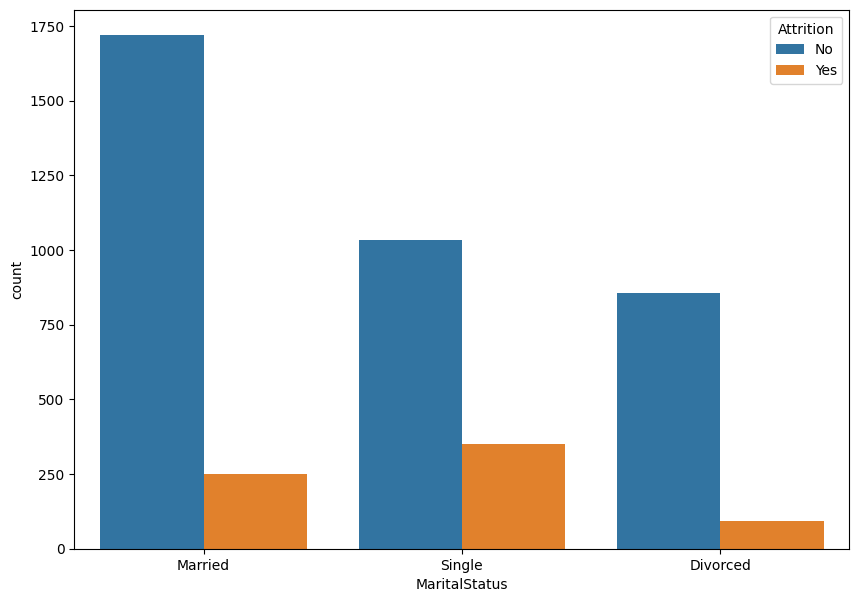

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x="MaritalStatus", hue="Attrition", data=data)
plt.show()

### Observation
##### Attrition rate is high among the employees whoes marital status is Single than people who are married or Divorced.

# 10. How does work-life balance affect attrition? Are employees with poor work-life balance more likely to leave the company?

<Axes: ylabel='count'>

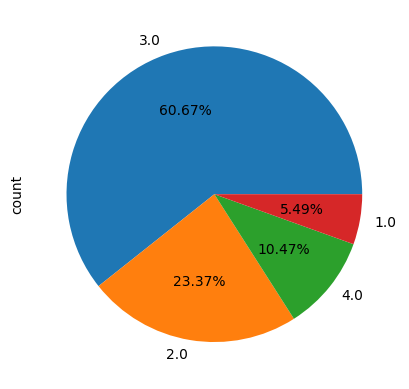

In [33]:
data["WorkLifeBalance"].value_counts().plot(kind= "pie", autopct= "%.2f%%")

##### The above  pie chart shows percentage of employee who rated work life balance as 1,2,3 ,4.
##### Most of the people rated worked life balance as 3 (around 60%) it means they are satisfied with work life balance.
#### only 5.59 % of employee rated 1 which is low satification. 

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

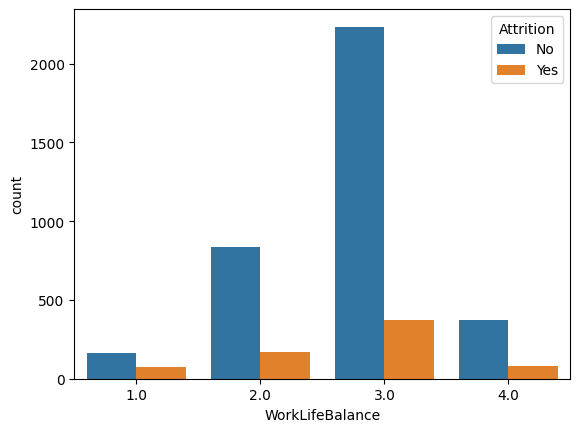

In [34]:
sns.countplot(x= "WorkLifeBalance", hue= "Attrition", data= data )

### Observation:
##### Above chart given information about work life balance rating given by employee who are currently working in the company
##### and who left the company.
##### By analyzing chart, we can say that most of employees rated 3 (high satisfcation) or 2 (medium satisafaction). 
##### But employee who has rated 3 (high satisfaction) also left the company followed by who have rated 2 (medium).


# 11. Does the satisfaction level of employees with their  environment affect attrition? Are employees with lower  environment satisfaction more likely to leave the company?

<Axes: ylabel='count'>

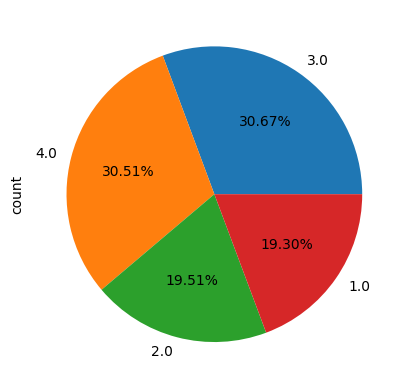

In [35]:
data["EnvironmentSatisfaction"].value_counts().plot(kind= "pie", autopct="%.2f%%")

### Observation:
##### Above chart shows rating given by all the employee for Environment satisfaction. From the Above pie chart , we can say that 
##### most of the employees (around 60%) rated 3  or 4 for Environment satifaction, which means they are satisfied with companies 
##### environment.

### Now let's see the satisfaction level of employees who have left the company and who are in the company.

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

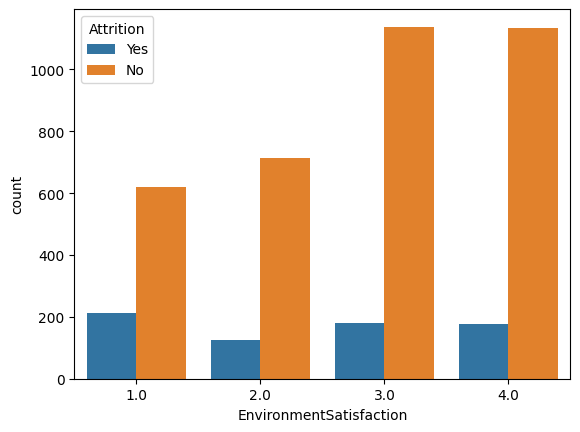

In [36]:
sns.countplot(x= "EnvironmentSatisfaction", hue= "Attrition", data= data )

### Observation:
##### By seeing above chart we can say that :
##### 1) Where attrition is No:-  means employee who are working in the company, are satisfied with the environment of the company, as they 
##### rated 3 and 4 
##### 2) Where attrition is Yes :- Means who employees left the company were not satisfied with the companies environment as they rated 1 (which is low satisfaction level)

# 12. Does the satisfaction level of employees with their job  affect attrition?

<Axes: ylabel='count'>

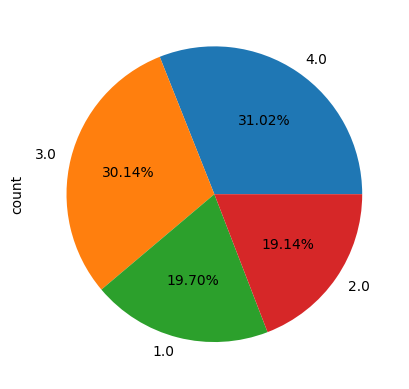

In [37]:
data["JobSatisfaction"].value_counts().plot(kind= "pie", autopct="%.2f%%")

### Observation:
By seeing above chart we can say that, around 60% of employees are statisfied with their job. 